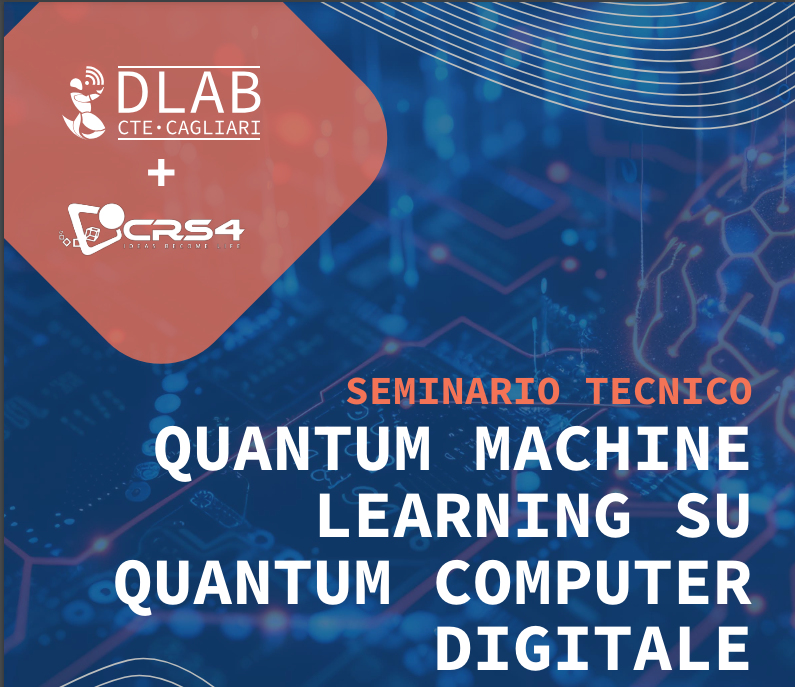

## Crediti

Il presente notebook è stato redatto da Giuliana Siddi Moreau del CRS4 nell'ambito delle esercitazioni pratiche dei seminari tecniche del Cagliari Digital Lab
Tale materiale formativo è stato redatto sulla base di:
* il dataset utilizzato in Mckinsey Analytics Online Hackathon, reperibile in https://www.kaggle.com/datasets/utathya/smart-city-traffic-patterns 
* Il notebook realizzato su kaggle da 
KAVYAN, reperibile in  https://www.kaggle.com/code/kavya2004/traffic-pattern-prediction-96
* Il materiale didattico di Qiskit Machine Learning https://qiskit-community.github.io/qiskit-machine-learning/tutorials/02_neural_network_classifier_and_regressor.html
* l'eccellente ispirazione trovata nei lavori di Kevin Kawchak https://github.com/kevinkawchak

# Esercitazione pratica
Per trasformare la città in una smart city, occorre trasformarla in una città digitale e intelligente per migliorare l'efficienza dei servizi per i cittadini. Uno dei problemi che l'amministrazione comunale deve affrontare è il traffico. 
Ci siamo ispirati al caso d'uso presentato in kaggle 
Il governo vuole implementare un sistema di traffico solido per la città, preparandosi ai picchi di traffico. Vogliono capire i modelli di traffico dei quattro incroci della città. L'andamento del traffico nei giorni festivi, così come in altre occasioni durante l'anno, è diverso da quello dei normali giorni lavorativi. È importante tenerne conto per le previsioni.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./traffic_4qubits_second.ipynb
./traffic_quantum_Machine_Learning.ipynb
./traffic_quantum_4qubits-ott.ipynb
./traffic_4qubits_fourth.ipynb
./traffic_4_int1_quantum_4qubits.ipynb
./traffic_4qubits_fifth.ipynb
./traffic_4_int1_quantum_3.ipynb
./train_aWnotuB.csv
./traffic_4_int1_quantum_old.ipynb
./traffic_4qubits_first.ipynb
./traffic_4qubits_sixth.ipynb
./test_BdBKkAj.csv
./traffic_4qubits_third.ipynb
./.ipynb_checkpoints/traffic_4qubits_first-checkpoint.ipynb
./.ipynb_checkpoints/traffic_4qubits_second-checkpoint.ipynb
./.ipynb_checkpoints/traffic_4_int1_quantum_4qubits-checkpoint.ipynb
./.ipynb_checkpoints/traffic_4qubits_sixth-checkpoint.ipynb
./.ipynb_checkpoints/traffic_4qubits_third-checkpoint.ipynb
./.ipynb_checkpoints/traffic_4qubits_fifth-checkpoint.ipynb
./.ipynb_checkpoints/traffic_quantum_4qubits-ott-checkpoint.ipynb
./.ipynb_checkpoints/traffic_4_int1_quantum_3-checkpoint.ipynb
./.ipynb_checkpoints/traffic_quantum_Machine_Learning-checkpoint.ipynb
./.ipynb_checkpoints/traf

/tmp/ipykernel_10302/578588909.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
!pip install seaborn lightgbm xgboost pydantic sympy qiskit_algorithms

In [3]:
from sklearn.decomposition import PCA
from qiskit_algorithms.utils import algorithm_globals

algorithm_globals.random_seed = 2024


In [4]:
#importing required libraries 

import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import time
import seaborn as sns

from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *
import lightgbm as lgb
import xgboost as xgb

# Boosting Algorithm Libraries :
from sklearn.ensemble import RandomForestRegressor


In [5]:
test = pd.read_csv('test_BdBKkAj.csv')
train = pd.read_csv('train_aWnotuB.csv')

In [6]:
def data_inf(data,name):
    print('rows: ',data.shape[0],' ,columns: ',data.shape[1],' in',name,'\n')
    data.info()
    print('\n')
data_inf(train,'Train')


rows:  48120  ,columns:  4  in Train 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB




In [7]:
display(train.describe())
display(train.describe(include = 'object'))

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


,DateTime
count,48120
unique,14592
top,2017-03-02 06:00:00
freq,4


In [8]:
print('before dropping ',train.shape[0])
train.drop_duplicates(keep="first", inplace=True) 
print('after dropping ',train.shape[0])

before dropping  48120
after dropping  48120


In [9]:
if(train.isnull().sum().sum()==0):
    print('no missing values in train')
else:
    train.fillna(method='ffill',inplace=True)
if(test.isnull().sum().sum()==0):
    print('no missing values in test')    
else:
    test.fillna(method='ffill',inplace=True)

no missing values in train
no missing values in test


In [10]:
print('before converting :',train['DateTime'].dtype)
train['DateTime'] = pd.to_datetime(train['DateTime'])
test['DateTime'] = pd.to_datetime(test['DateTime'])
print('after converting :',train['DateTime'].dtype)

before converting : object
after converting : datetime64[ns]


In [11]:
tr_mask=train['Junction'].isin([1])
train=train[tr_mask]
te_mask=test['Junction'].isin([1])
test=test[te_mask]

In [12]:
train.describe()

,DateTime,Junction,Vehicles,ID
count,14592,14592.0,14592.000000,1.459200e+04
mean,2016-08-30 23:30:00,1.0,45.052906,2.016260e+10
min,2015-11-01 00:00:00,1.0,5.000000,2.015110e+10
25%,2016-03-31 23:45:00,1.0,27.000000,2.016038e+10
50%,2016-08-30 23:30:00,1.0,40.000000,2.016083e+10
75%,2017-01-29 23:15:00,1.0,59.000000,2.017013e+10
max,2017-06-30 23:00:00,1.0,156.000000,2.017063e+10
std,NaN,0.0,23.008345,5.779594e+06


In [13]:
# Exploring more features  
train["Year"]= train['DateTime'].dt.year  
train["Month"]= train['DateTime'].dt.month  
train["Date_no"]= train['DateTime'].dt.day  
train["Hour"]= train['DateTime'].dt.hour  
train["Day"]= train.DateTime.dt.dayofweek


test["Year"]= test['DateTime'].dt.year  
test["Month"]= test['DateTime'].dt.month  
test["Date_no"]= test['DateTime'].dt.day  
test["Hour"]= test['DateTime'].dt.hour  
test["Day"]= test.DateTime.dt.dayofweek

In [14]:
test.describe()

,DateTime,Junction,ID,Year,Month,Date_no,Hour,Day
count,2952,2952.0,2.952000e+03,2952.0,2952.000000,2952.000000,2952.000000,2952.000000
mean,2017-08-31 11:30:00.000000256,1.0,2.017087e+10,2017.0,8.495935,15.878049,11.500000,3.000000
min,2017-07-01 00:00:00,1.0,2.017070e+10,2017.0,7.000000,1.000000,0.000000,0.000000
25%,2017-07-31 17:45:00,1.0,2.017073e+10,2017.0,7.000000,8.000000,5.750000,1.000000
50%,2017-08-31 11:30:00,1.0,2.017083e+10,2017.0,8.000000,16.000000,11.500000,3.000000
75%,2017-10-01 05:15:00,1.0,2.017100e+10,2017.0,10.000000,24.000000,17.250000,5.000000
max,2017-10-31 23:00:00,1.0,2.017103e+10,2017.0,10.000000,31.000000,23.000000,6.000000
std,NaN,0.0,1.124808e+05,0.0,1.121847,8.878793,6.923359,2.020565


/tmp/ipykernel_10302/1829596167.py:4: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  time_series=sns.lineplot(x=train['DateTime'],y="Vehicles",data=train, hue="Junction", palette=colors)


Text(0.5, 0, 'DateTime')

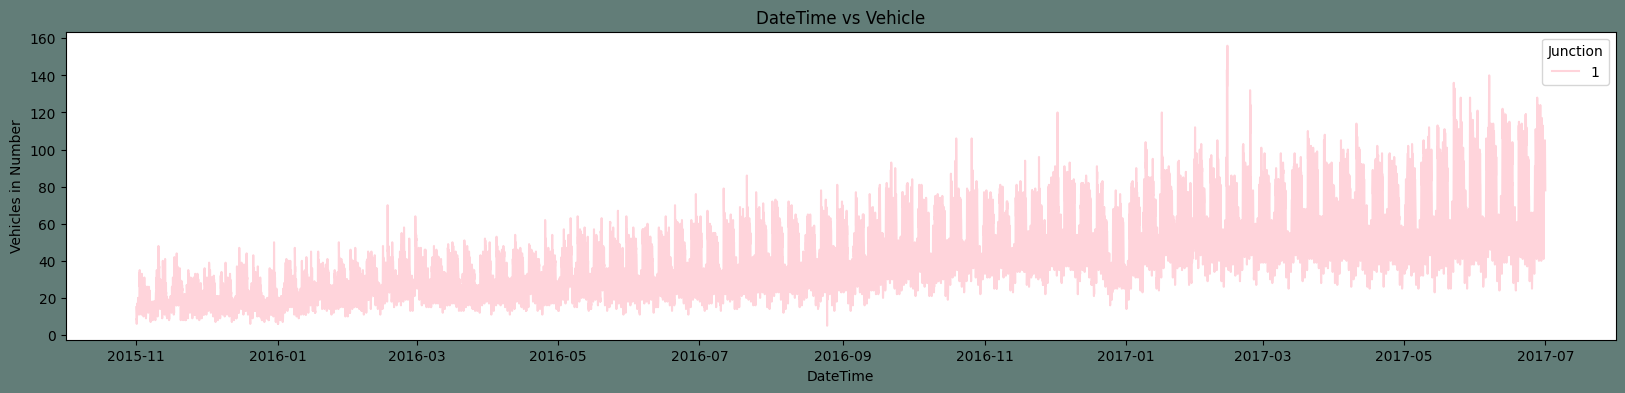

In [15]:
# time series plot
colors = [ "#FFD4DB","#BBE7FE","#D3B5E5","#dfe2b6"]
plt.figure(figsize=(20,4),facecolor="#627D78")  
time_series=sns.lineplot(x=train['DateTime'],y="Vehicles",data=train, hue="Junction", palette=colors)  
time_series.set_title("DateTime vs Vehicle")  
time_series.set_ylabel("Vehicles in Number")  
time_series.set_xlabel("DateTime") 

/tmp/ipykernel_10302/2121896102.py:4: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  count = sns.countplot(data=train, x =train["Year"], hue="Junction", palette=colors)


Text(0.5, 0, 'Date')

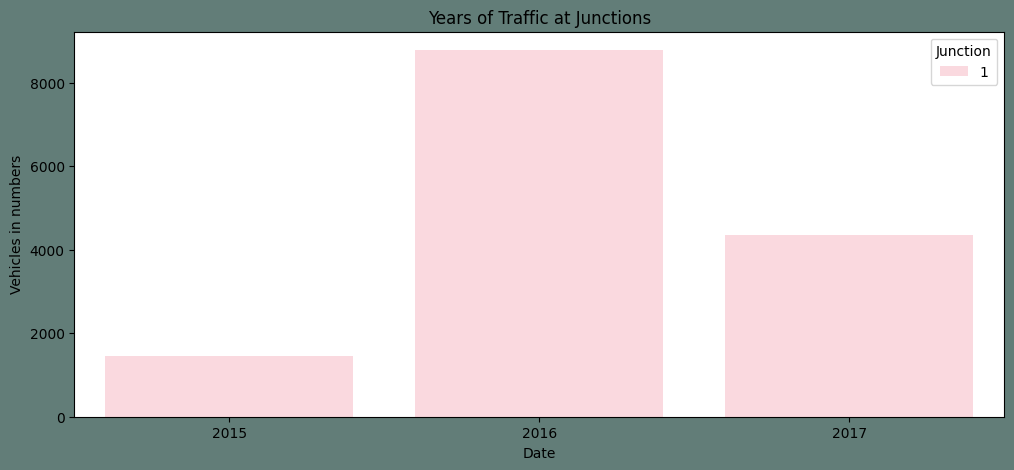

In [16]:
#years of traffic at junction
plt.figure(figsize=(12,5),facecolor="#627D78")  
colors = [ "#FFD4DB","#BBE7FE","#D3B5E5","#dfe2b6"]
count = sns.countplot(data=train, x =train["Year"], hue="Junction", palette=colors)  
count.set_title("Years of Traffic at Junctions")  
count.set_ylabel("Vehicles in numbers")  
count.set_xlabel("Date") 


<Axes: >

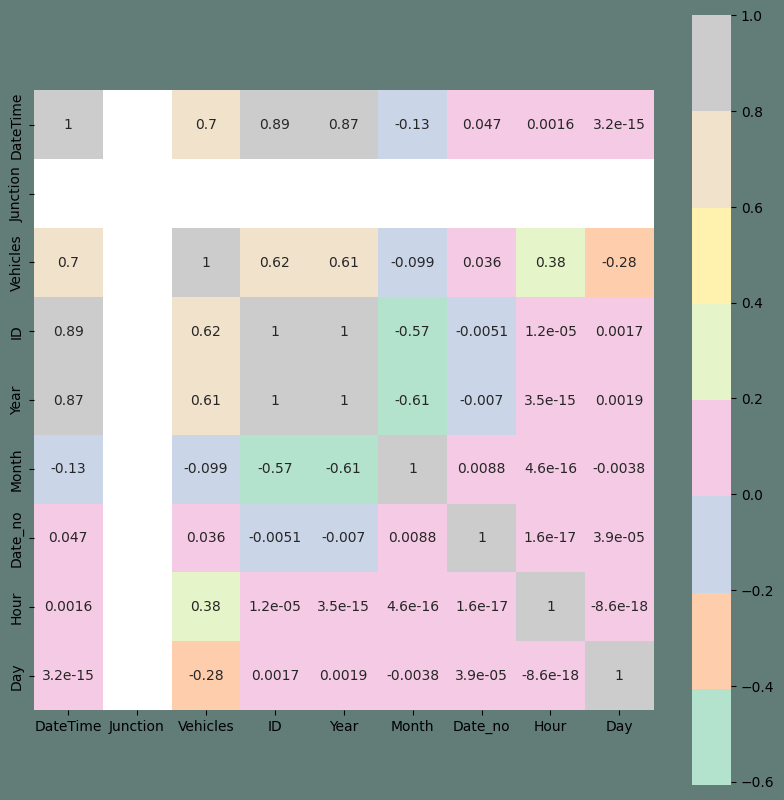

In [17]:
#heat map
corrmat = train.corr()  
plt.subplots(figsize=(10,10),facecolor="#627D78")  
sns.heatmap(corrmat,cmap= "Pastel2",annot=True,square=True, )  



In [18]:
def datetounix1(df):
    # Initialising unixtime list
    unixtime = []
    
    # Running a loop for converting Date to seconds
    for date in df['DateTime']:
        unixtime.append(time.mktime(date.timetuple()))
    
    # Replacing Date with unixtime list
    df['DateTime'] = unixtime
    return(df)

In [19]:
train_features = datetounix1(train.drop(['Vehicles'], axis=1))

train_features = datetounix1(train)
test_features = datetounix1(test)


# Store Features / Predictors in array :
X = train_features  
X_valid = test_features

# One Hot Encoding - Using Dummies :
#X = pd.get_dummies(X)
#X_valid = pd.get_dummies(X_valid)

# Store target 'Vehicles' in y array :
y = train['Vehicles'].to_frame()

#y_valid=test['Vehicles'].to_frame()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=512)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 9776, number of used features: 7
[LightGBM] [Info] Start training from score 44.751944
Mean Squared Error: 19.184953271759433
Mean Absolute Error: 3.047306743177696
R2 Score: 0.9644295353898664

Random Forest regressor 
ean Squared Error: 17.23255269933555
Mean Absolute Error: 2.9512832225913623
R2 Score: 0.9680494449347302

In [20]:
print(X_train)

           DateTime  Junction  Vehicles           ID  Year  Month  Date_no  \
8681   1.477588e+09         1        67  20161027171  2016     10       27   
4959   1.464188e+09         1        50  20160525151  2016      5       25   
5334   1.465538e+09         1        23  20160610061  2016      6       10   
10479  1.484060e+09         1        84  20170110151  2017      1       10   
8881   1.478308e+09         1        48  20161105011  2016     11        5   
...             ...       ...       ...          ...   ...    ...      ...   
1181   1.450588e+09         1         6  20151220051  2015     12       20   
3309   1.458248e+09         1        41  20160317211  2016      3       17   
8552   1.477123e+09         1        29  20161022081  2016     10       22   
12041  1.489684e+09         1        79  20170316171  2017      3       16   
13217  1.493917e+09         1        89  20170504171  2017      5        4   

       Hour  Day  
8681     17    3  
4959     15    2  
5334  

In [21]:
import pandas as pd
from sklearn import preprocessing

from sklearn.decomposition import PCA
pca = PCA(n_components=4) # vogliamo proiettare due dimensioni in modo da poterle visualizzare!

# Addestriamo il modello PCA sui dati standardizzati
pca_features = pca.fit_transform(train_features)
#pca_valid_f=pca.transform(X_valid)

#pca_valid_features_quantum=pd.DataFrame(pca_valid_f)

pca_features_quantum = pd.DataFrame(pca_features)

pca_features_quantum.describe()

,0,1,2,3
count,1.459200e+04,1.459200e+04,1.459200e+04,1.459200e+04
mean,-3.921358e-07,-1.140837e-06,-6.024031e-14,3.510019e-13
std,1.603490e+07,2.502426e+06,1.695136e+01,8.738875e+00
min,-2.744322e+07,-4.544018e+06,-4.765143e+01,-1.645763e+01
25%,-1.487732e+07,-2.108076e+06,-1.245419e+01,-7.490414e+00
50%,5.825052e+05,-1.854917e+05,-1.561405e+00,-2.932894e-02
75%,1.313072e+07,2.353829e+06,1.255262e+01,7.497797e+00
max,2.858520e+07,4.789064e+06,9.453454e+01,1.714952e+01


In [22]:
x = pca_features_quantum.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_features_quantum = pd.DataFrame(x_scaled)
min_max_scaler = preprocessing.MinMaxScaler()
y_scaled = min_max_scaler.fit_transform(y.values)
#y_valid_scaled=min_max_scaler.transform(y_valid.values)
y_quantum = pd.DataFrame(y_scaled)

In [23]:
train_features_quantum.describe()

,0,1,2,3
count,14592.000000,14592.000000,14592.000000,14592.000000
mean,0.489809,0.486872,0.335135,0.489706
std,0.286192,0.268124,0.119220,0.260030
min,0.000000,0.000000,0.000000,0.000000
25%,0.224277,0.261001,0.247544,0.266825
50%,0.500205,0.466998,0.324153,0.488833
75%,0.724167,0.739075,0.423418,0.712807
max,1.000000,1.000000,1.000000,1.000000


In [24]:
y_quantum.describe()

,0
count,14592.000000
mean,0.265251
std,0.152373
min,0.000000
25%,0.145695
50%,0.231788
75%,0.357616
max,1.000000


In [25]:
X=train_features_quantum
X_train_q, X_test_q, y_train_q, y_test_q = train_test_split(X, y_quantum, test_size=0.33, random_state=512)

In [26]:
print (X_train_q.values)

[[0.41498263 0.82195813 0.45965477 0.78671252]
 [0.64377217 0.40051811 0.43577022 0.77929414]
 [0.62051956 0.43950549 0.22578032 0.33142028]
 ...
 [0.42283994 0.80610603 0.18783862 0.64397096]
 [0.15657184 0.30837135 0.45191197 0.50189154]
 [0.08411119 0.43855619 0.4896874  0.12819648]]


In [27]:
from IPython.display import clear_output
# callback function that draws a live plot when the .fit() method is called
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [28]:
!pip install qiskit_machine_learning pylatexenc

In [29]:
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit_algorithms.optimizers import COBYLA, L_BFGS_B, POWELL, ADAM
from qiskit_machine_learning.circuit.library import QNNCircuit
# construct simple feature map
#param_x = Parameter("x")
#feature_map = QuantumCircuit(7, name="fm")
#feature_map.ry(param_x, 0)
from qiskit.circuit.library import ZZFeatureMap
features=X_train_q.values

num_features = features.shape[1]


In [30]:
from qiskit.circuit.library import RealAmplitudes
from qiskit.circuit import QuantumCircuit, Parameter
#ansatz_4 = RealAmplitudes(4, reps=2)
#ansatz_4.decompose().draw(output="mpl", style="clifford", fold=20)
num_features=4
def ans(n, depth):
    qc=QuantumCircuit(n)
    for j in range(depth):
        for i in range(n):
            param_name=f'theta_{j}_{i}'
            theta_param=Parameter(param_name)
            if depth%3==0:
                qc.ry(theta_param,i)
            elif depth%3==1:
                qc.rz(theta_param,i)
            elif depth%3==2:
                qc.rx(theta_param,i)
    for i in range(n):
        if i == n-1:
            qc.cx(i,0)
        else:
            qc.cx(i, i+1)
    return(qc)
        

ansatz_4=ans(num_features,2)

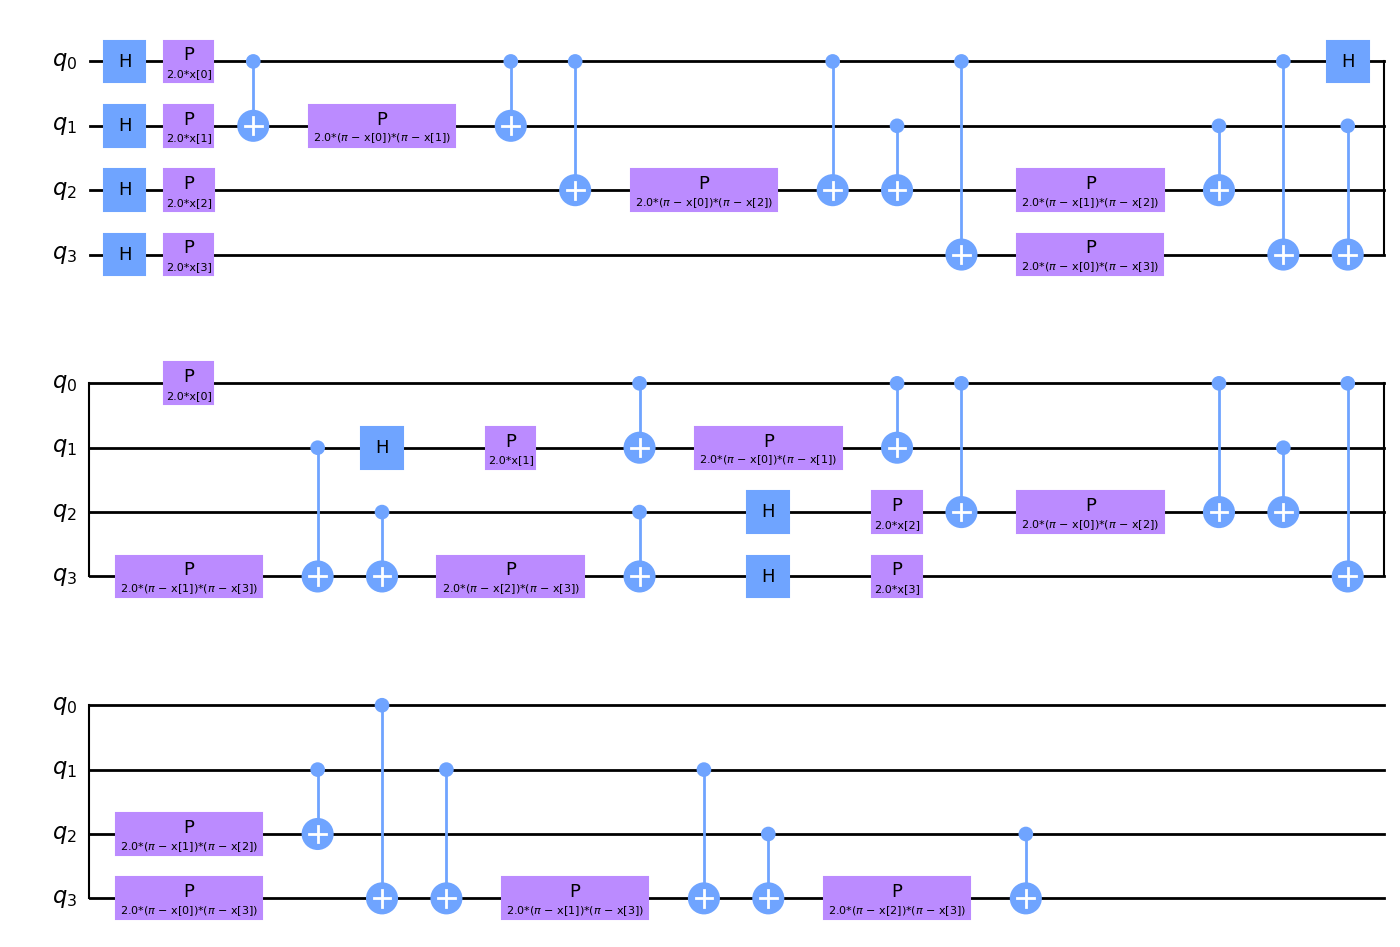

In [31]:
from qiskit.circuit.library import ZFeatureMap, PauliFeatureMap
# best pauli=2
#feature_map= PauliFeatureMap(feature_dimension=4, reps=3)
feature_map= ZZFeatureMap(4, reps=2)
feature_map.decompose().draw(output="mpl", style="clifford", fold=20)


In [32]:
#param_y = Parameter("y")
#ansatz = QuantumCircuit(7, name="vf")
#ansatz.ry(param_y, 0)
X_q=X_train_q.values
y_q=y_train_q.values
X_te_q=X_test_q.values
y_te_q=y_test_q.values

print(X_q.shape)
#X_q=np.reshape(X_q,(9776,4))
#print(X_q.shape)
X_train_q.describe()

print(X_te_q.shape)
te_shape=X_te_q.shape[0]
#X_te_q=np.reshape(X_te_q,(te_shape,4))
#print(X_te_q.shape)
X_test_q.describe()


(9776, 4)
(4816, 4)


,0,1,2,3
count,4816.000000,4816.000000,4816.000000,4816.000000
mean,0.485160,0.486334,0.337778,0.491083
std,0.284769,0.265784,0.119951,0.258622
min,0.000364,0.000881,0.011954,0.000000
25%,0.224338,0.261953,0.248498,0.270609
50%,0.495629,0.472958,0.327798,0.488768
75%,0.717457,0.734216,0.426930,0.711714
max,0.999818,1.000000,0.902992,1.000000


In [33]:
from qiskit.circuit import Parameter
from qiskit import QuantumCircuit
# construct simple feature map
param_x = Parameter("x")
#feature_map = QuantumCircuit(1, name="fm")
#feature_map.ry(param_x, 0)

# construct simple ansatz
param_y = Parameter("y")
#ansatz = QuantumCircuit(1, name="vf")
#ansatz.ry(param_y, 0)

In [34]:
# construct a circuit
qc = QNNCircuit(feature_map=feature_map, ansatz=ansatz_4)

# construct QNN
regression_estimator_qnn = EstimatorQNN(circuit=qc)
# construct the regressor from the neural network
regressor = NeuralNetworkRegressor(
    neural_network=regression_estimator_qnn,
    loss="squared_error",
    optimizer=POWELL(maxiter=180, maxfev=180),
    callback=callback_graph,
)
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

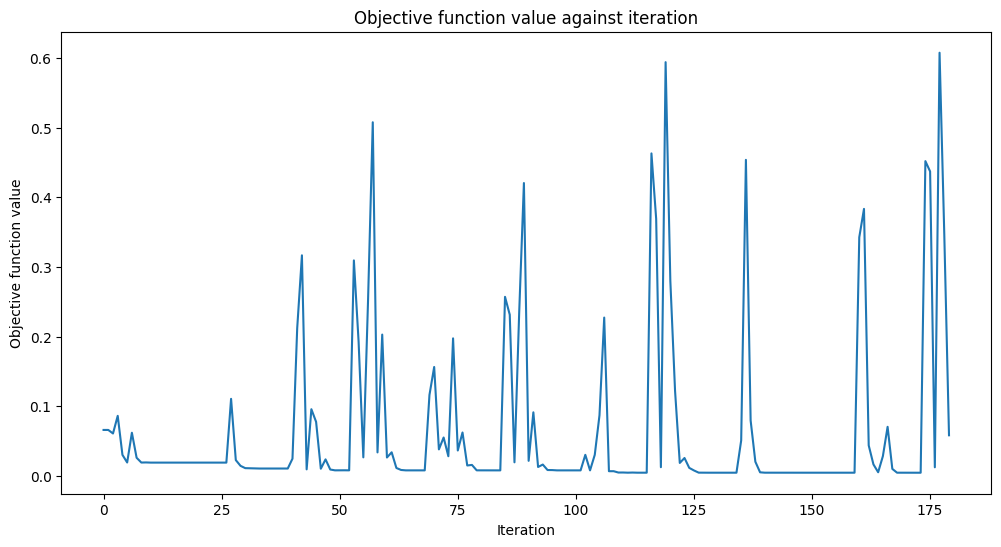

In [35]:
# fit to data
y_q=y_train_q.values
regressor.fit(X_q, y_q)

In [36]:
y_te_q=y_test_q.values

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score the result

regressor.score(X_q, y_q)

0.8070567999419349

In [37]:
y_te_q_r=regressor.predict(X_te_q)

In [38]:
mse = mean_squared_error(y_te_q, y_te_q_r)
mae = mean_absolute_error(y_te_q, y_te_q_r)
r2 = r2_score(y_te_q, y_te_q_r)

# Printing the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

Mean Squared Error: 0.004625782779232485
Mean Absolute Error: 0.053810992001301294
R2 Score: 0.8044454515809377


before with ans3 
Mean Squared Error: 0.023243922887376412
Mean Absolute Error: 0.1101634570134026
R2 Score: 0.017365263207930748

Ans4 of second 
Mean Squared Error: 0.019152586537345032
Mean Absolute Error: 0.10182079095624406
R2 Score: 0.19032613719294544

Ans4 of third
Mean Squared Error: 0.015943559072065218
Mean Absolute Error: 0.10330885035006208
R2 Score: 0.32598748291253077

Ans4 of fourth
Mean Squared Error: 0.012867099049320204
Mean Absolute Error: 0.08714079979950619
R2 Score: 0.45604455199458127
second time
Mean Squared Error: 0.01871098764625956
Mean Absolute Error: 0.10118803763779102
R2 Score: 0.20899469035464535

With ZZfeaturemap reps=2
Mean Squared Error: 0.009022282491571762

R2 Score: 0.618583824067659
same
Mean Squared Error: 0.010970522839602778
Mean Absolute Error: 0.08546837793653524
R2 Score: 0.5362221396449822


Mean Squared Error: 0.015357655525067078
Mean Absolute Error: 0.10109019442906578
R2 Score: 0.35075650234525

Mean Squared Error: 0.002726155916677468
Mean Absolute Error: 0.04231514623049957
R2 Score: 0.8847520053040037

Mean Squared Error: 0.007005907646064489
Mean Absolute Error: 0.062240909228942834
R2 Score: 0.7038258882058629

iteration 90
Mean Squared Error: 0.011414458147476048
Mean Absolute Error: 0.08301049540544847
R2 Score: 0.5174548146749933

Mean Squared Error: 0.008245118583203289
Mean Absolute Error: 0.07322372434297707
R2 Score: 0.6514383579707426

Mean Squared Error: 0.01398869909585768
Mean Absolute Error: 0.0963416954341771
R2 Score: 0.4086290115173806



let's go for 100

Mean Squared Error: 0.011063552186088132
Mean Absolute Error: 0.08157521649777458
R2 Score: 0.532289332440256

Mean Squared Error: 0.005462572680642801
Mean Absolute Error: 0.0602846069083387
R2 Score: 0.7690702342173855


120
Mean Squared Error: 0.008241583836597002
Mean Absolute Error: 0.060765160956519425
R2 Score: 0.6515877890636748

Mean Squared Error: 0.006086233549494311
Mean Absolute Error: 0.060909173283251614
R2 Score: 0.7427050274198599

140
Mean Squared Error: 0.006821381668735624
Mean Absolute Error: 0.06544751104877874
R2 Score: 0.7116267072002471

Mean Squared Error: 0.004743584644986486
Mean Absolute Error: 0.0555130248383024
R2 Score: 0.7994653883657193

Mean Squared Error: 0.010532159836583775
Mean Absolute Error: 0.07822459712789813
R2 Score: 0.5547538959314778

Mean Squared Error: 0.013708516351595744
Mean Absolute Error: 0.08391925629520587
R2 Score: 0.42047371167817105

In [39]:
#y_valid=test['Vehicles'].to_frame()
#pca_valid_f=pca.transform(X_valid)

#pca_valid_features_quantum=pd.DataFrame(pca_valid_f)
#x_v = pca_valid_features_quantum.values #returns a numpy array
#x_v_scaled = min_max_scaler.transform(x_v)
#valid_features_quantum = pd.DataFrame(x_v_scaled)

X_v_q=valid_features_quantum.values
y_v_q_r=regressor.predict(X_v_q)